
Logistic Regression
Accuracy: 0.9555555555555556
Confusion Matrix:
 [[11  0  0]
 [ 0 15  0]
 [ 0  2 17]]

K-Nearest Neighbors
Accuracy: 0.9111111111111111
Confusion Matrix:
 [[11  0  0]
 [ 0 15  0]
 [ 0  4 15]]

Decision Tree
Accuracy: 0.9111111111111111
Confusion Matrix:
 [[11  0  0]
 [ 0 15  0]
 [ 0  4 15]]

Support Vector Machine
Accuracy: 0.9555555555555556
Confusion Matrix:
 [[11  0  0]
 [ 0 15  0]
 [ 0  2 17]]


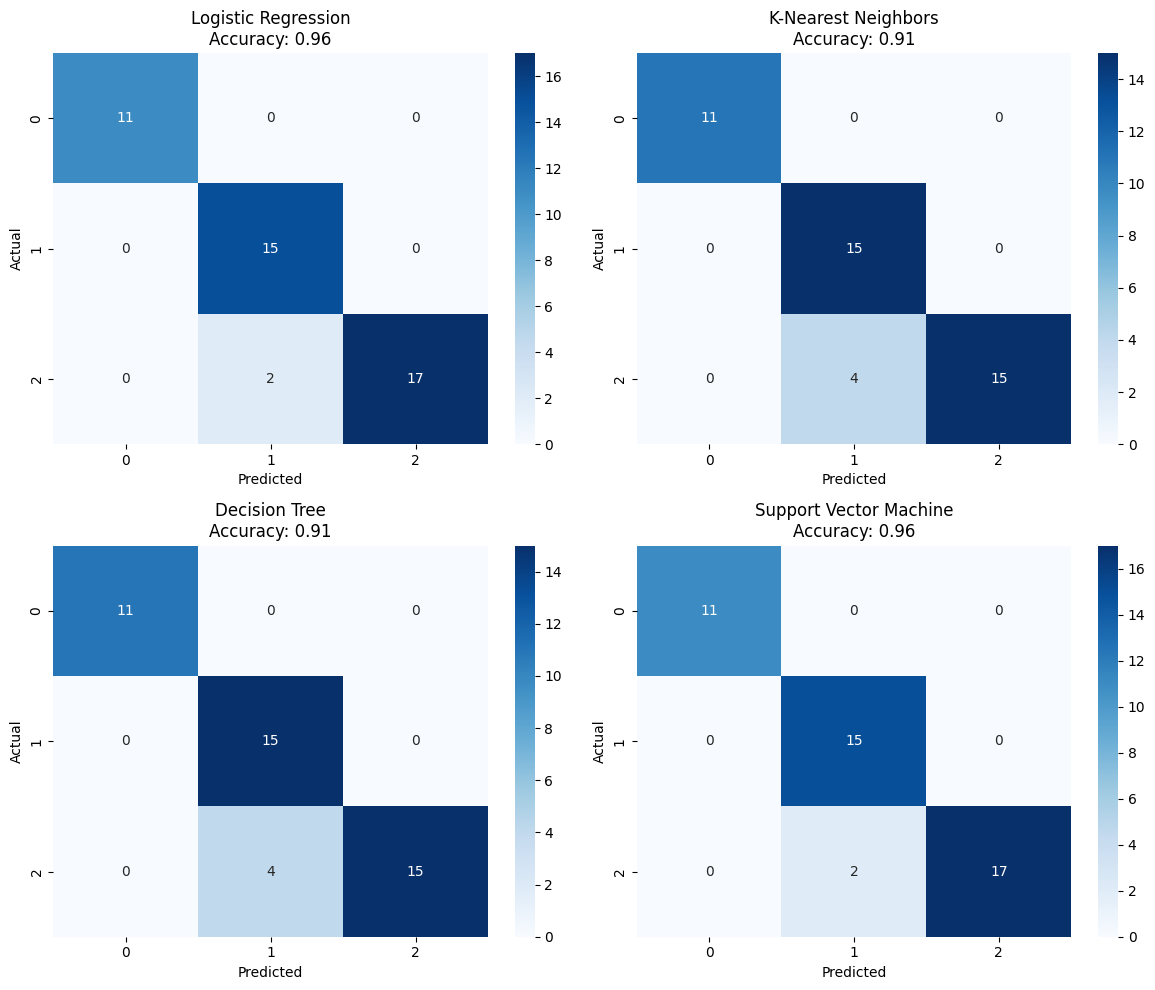

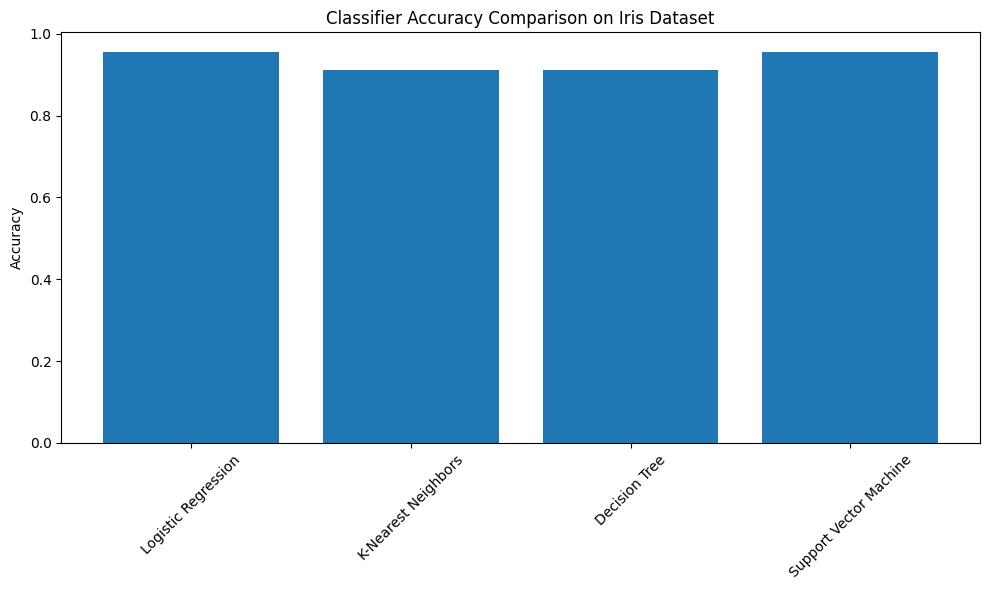

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine': SVC()
}

accuracies = {}

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, (name, model) in enumerate(classifiers.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    accuracies[name] = acc

    print(f"\n{name}")
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", cm)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f"{name}\nAccuracy: {acc:.2f}")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values())
plt.ylabel("Accuracy")
plt.title("Classifier Accuracy Comparison on Iris Dataset")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
